In [1]:
from tensorflow import keras
import tensorflow as tf

In [5]:
import os
# 数据集https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip 
# Directory with our training horse pictures
train_horse_dir = os.path.join('../horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('../horse-or-human/humans')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#构建两个数据生成器（一次读入batch，缓解内存压力）
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(directory=train_horse_dir,
                                                    target_size=(300,300),
                                                   batch_size=32,
                                                   class_mode="binary")

train_generator = train_datagen.flow_from_directory(directory=train_horse_dir,
                                                    target_size=(300,300),
                                                   batch_size=32,
                                                   class_mode="binary")

In [7]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[0:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[0:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [8]:
# 人和马图片总数
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
# 每张图片4X4
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

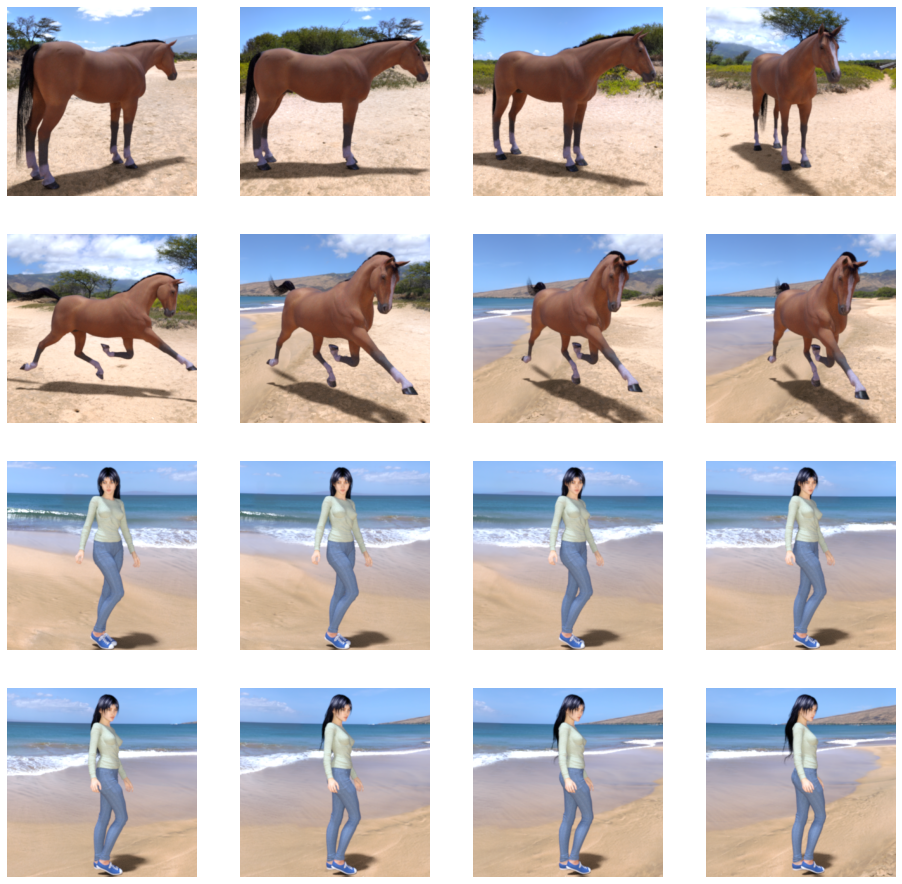

In [14]:
fig = plt.gcf()
# 展示16张图片
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index = pic_index + 8

next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i,img_path in enumerate(next_horse_pix+next_human_pix):
    sp = plt.subplot(nrows,ncols,i+1)
    # 关闭坐标轴
    sp.axis('Off')
    # 读取图片方法
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [15]:
# 模型
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [18]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(directory='../horse-or-human/',
                                                    target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode="binary")

Found 1027 images belonging to 2 classes.


In [20]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 2s 177ms/step - loss: 0.7192 - acc: 0.5041
Epoch 2/15
8/8 [==============================] - 2s 180ms/step - loss: 0.6396 - acc: 0.6349
Epoch 3/15
8/8 [==============================] - 1s 175ms/step - loss: 0.5524 - acc: 0.6815
Epoch 4/15
8/8 [==============================] - 2s 177ms/step - loss: 0.3180 - acc: 0.8799
Epoch 5/15
8/8 [==============================] - 1s 165ms/step - loss: 0.4034 - acc: 0.8153
Epoch 6/15
8/8 [==============================] - 2s 191ms/step - loss: 0.5603 - acc: 0.8521
Epoch 7/15
8/8 [==============================] - 2s 181ms/step - loss: 0.1892 - acc: 0.9308
Epoch 8/15
8/8 [==============================] - 1s 167ms/step - loss: 0.2119 - acc: 0.9253
Epoch 9/15
8/8 [==============================] - 2s 184ms/step - loss: 0.2285 - acc: 0.8900
Epoch 10/15
8/8 [==============================] - 1s 169ms/step - loss: 0.1678 - acc: 0.9467
Epoch 11/15
8/8 [==============================] - 1s 169ms/step - lo

(1, 150, 150, 3)
[[0.]]
horse0.jpg is a horse
(1, 150, 150, 3)
[[0.]]
human0.jpg is a horse
(1, 150, 150, 3)
[[1.]]
human01-01.png is a human


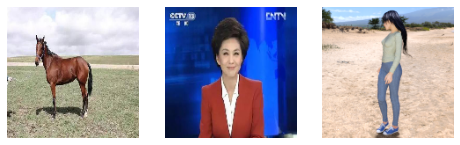

In [45]:
import numpy as np
from tensorflow.keras.preprocessing import image
import cv2

test_dir = '../horse-or-human/test/'
test_dir_files = os.listdir(test_dir)

plt.figure(figsize=(8,8))

for i,fname in enumerate(test_dir_files):
    image_path = test_dir + fname
    img = image.load_img(image_path,target_size=(150,150))
    x = image.img_to_array(img)
    plt.subplot(1,3,i+1)
    plt.axis('Off')
    plt.imshow(img)
    x = np.expand_dims(x, axis=0)
    print(x.shape)
    #img = cv2.imread(image_path,)/255
    #x = np.expand_dims(img, axis=0)
    #images = np.vstack([x])
    classes = model.predict(x)
    
    print(classes)
    if classes[0]>0.5:
        print(fname + " is a human")
    else:
        print(fname + " is a horse")

<ipython-input-50-4952bf92c544>:43: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


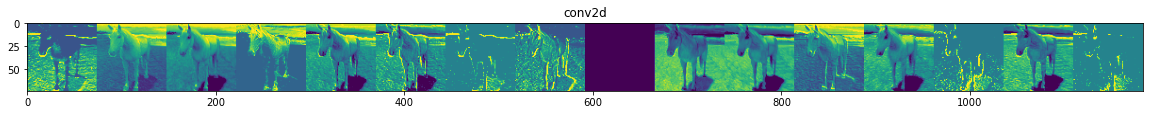

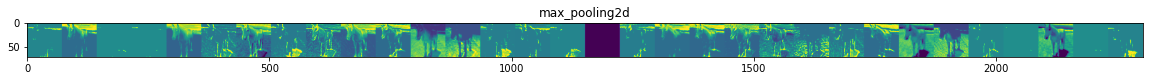

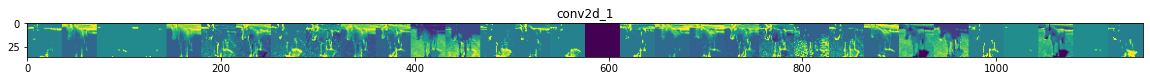

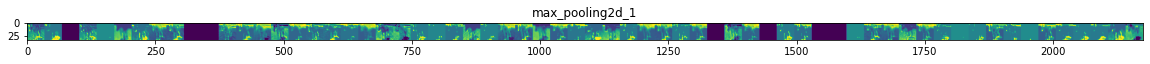

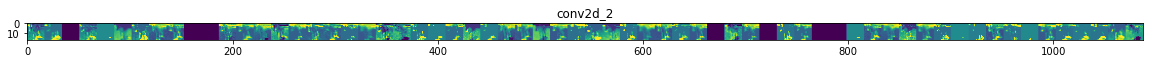

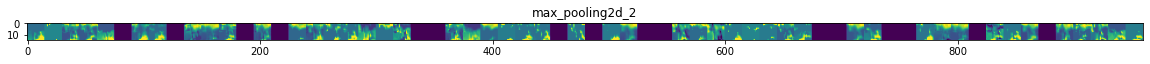

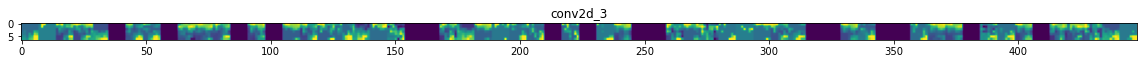

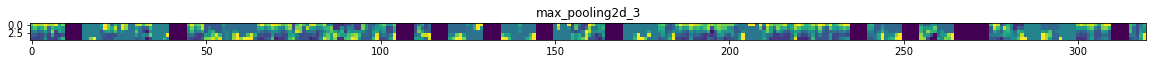

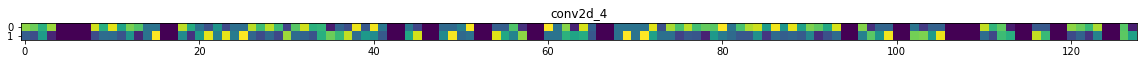

In [50]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps[0:9]):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
        # Postprocess the feature to make it visually palatable
        x = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        # We'll tile each filter into this big horizontal grid
        display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [56]:
from kerastuner.tuners import Hyperband
from kerastuner.engine.hyperparameters import HyperParameters

hp=HyperParameters()
def build_model(hp):
    model = tf.keras.models.Sequential()        
    model.add(tf.keras.layers.Conv2D(hp.Choice('num_filters_top_layer',values=[16,64],default=16), (3,3), 
                                     activation='relu', input_shape=(150, 150, 3)))
    model.add(tf.keras.layers.MaxPooling2D(2, 2))
    for i in range(hp.Int("num_conv_layers",1,3)):
        model.add(tf.keras.layers.Conv2D(hp.Choice(f'num_filters_layer{i}',values=[16,64],default=16), (3,3), activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(2,2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(hp.Int("hidden_units",128,512,step=32), activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])
    return model

In [58]:
tuner=Hyperband(
    build_model,
    objective='acc',
    max_epochs=10,
    directory='horse_human_params',
    hyperparameters=hp,
    project_name='my_horse_human_project'
)
tuner.search(train_generator,epochs=10)

Trial 30 Complete [00h 00m 56s]
acc: 1.0

Best acc So Far: 1.0
Total elapsed time: 00h 18m 52s
INFO:tensorflow:Oracle triggered exit


In [59]:
best_hps=tuner.get_best_hyperparameters(1)[0]
print(best_hps.values)
model=tuner.hypermodel.build(best_hps)
model.summary()

{'num_filters_top_layer': 16, 'num_conv_layers': 2, 'num_filters_layer0': 16, 'hidden_units': 416, 'num_filters_layer1': 64, 'num_filters_layer2': 16, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        9280      
___________________

<ipython-input-68-31163f27a219>:43: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

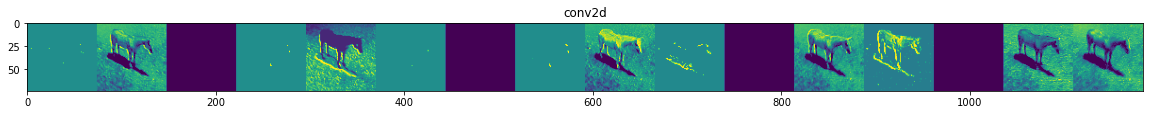

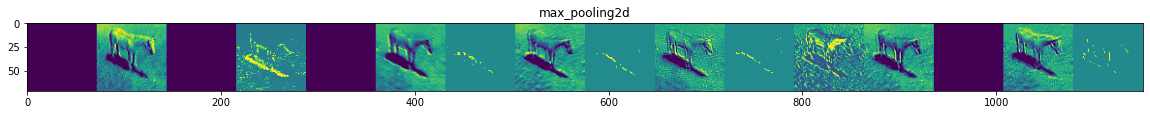

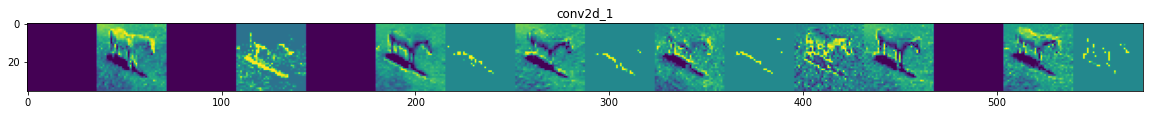

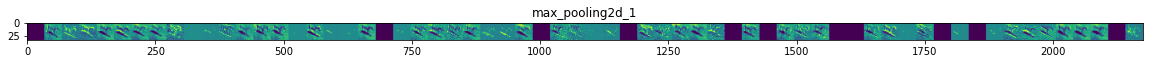

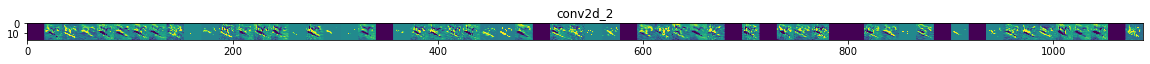

In [68]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps[0:6]):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
        # Postprocess the feature to make it visually palatable
        x = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        # We'll tile each filter into this big horizontal grid
        display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')